<a href="https://colab.research.google.com/github/KiboSennin/Ada-InformesRevision/blob/main/Merge_sort_Revisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Descripcion del problema 

Tenemos un problema de ordenamiento en el cual como entrada tenemos:

Una lista de entrada 


```
lista[a1, a2, a3,.....,an]
```
Para la salida esta lista tiene que estar ordenada de la sieguiente forma



```
lista[a1 < a2 < a3 <.....< an]


Una aparición de este problema puede ser al querer ordenar una lista enlazada ya que el mergeSort puede realizar esta funcion mejor que otros algoritmos de ordenamiento para esta funcion, ejemplo de esto es el quickSort que no puede realizar el ordenamiento en este tipo de listas.

# 1.1) Codigo 

In [22]:
def mergeSort(arr, l, r, verbose = False):
    global c, recur
    recur += 1
    if l == r: return 
    if l < r:
        m = l+(r-l)//2
        mergeSort(arr, l, m, verbose)
        mergeSort(arr, m+1, r, verbose)
        merge(arr, l, m, r, verbose)
    return

In [23]:
def merge(arr, l, m, r, verbose = False):
    global c
    
    n1 = m - l + 1
    n2 = r - m

    Left = [0] * (n1) 
    Right = [0] * (n2) 

    for i in range(0, n1):
        Left[i] = arr[l + i]
 
    for j in range(0, n2):
        Right[j] = arr[m + 1 + j]

    if verbose:
        print("Lista izquierda:", Left)
        print("Lista derecha:", Right)

    i = j = 0         
    k = l    

    while i < n1 and j < n2:
        
        c += 1

        if Left[i] <= Right[j]:
            arr[k] = Left[i]
            i += 1
        else:
            arr[k] = Right[j]
            j += 1
        k += 1

    if verbose:
        print("Comparaciones acumuladas:",c)

    while i < n1:
        arr[k] = Left[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = Right[j]
        j += 1
        k += 1

    if verbose:
        print("Resultado merge:",arr, "\n")

    return

In [24]:
import random
arr = random.sample(range(1, 100), 6)
print("Entrada:", arr, "\n")
n = len(arr)
cont, recur = 0, 0
mergeSort(arr, 0, n-1 , True)
print("Salida:", arr)
print("Comparaciones totales",cont)
print("Llamadas recursivas",recur)

Entrada: [53, 17, 71, 92, 24, 34] 

Lista izquierda: [53]
Lista derecha: [17]
Comparaciones acumuladas: 1
Resultado merge: [17, 53, 71, 92, 24, 34] 

Lista izquierda: [17, 53]
Lista derecha: [71]
Comparaciones acumuladas: 3
Resultado merge: [17, 53, 71, 92, 24, 34] 

Lista izquierda: [92]
Lista derecha: [24]
Comparaciones acumuladas: 4
Resultado merge: [17, 53, 71, 24, 92, 34] 

Lista izquierda: [24, 92]
Lista derecha: [34]
Comparaciones acumuladas: 6
Resultado merge: [17, 53, 71, 24, 34, 92] 

Lista izquierda: [17, 53, 71]
Lista derecha: [24, 34, 92]
Comparaciones acumuladas: 11
Resultado merge: [17, 24, 34, 53, 71, 92] 

Salida: [17, 24, 34, 53, 71, 92]
Comparaciones totales 0
Llamadas recursivas 11


# Descripcion del algoritmo 

El merge sort aplica una serie recursiva de pasos los cuales son los siguientes



*   Toma la lista completa para asi dividirla a la mitad
*   Luego vuelve a dividir hasta tener arreglos con solo 1 valor en su interior 
*   Ahora aplicamos la funcion merge la cual ordena los arreglos
*   Finalmente la misma funcion merge une a los arreglos y devolver la lista ordenada 

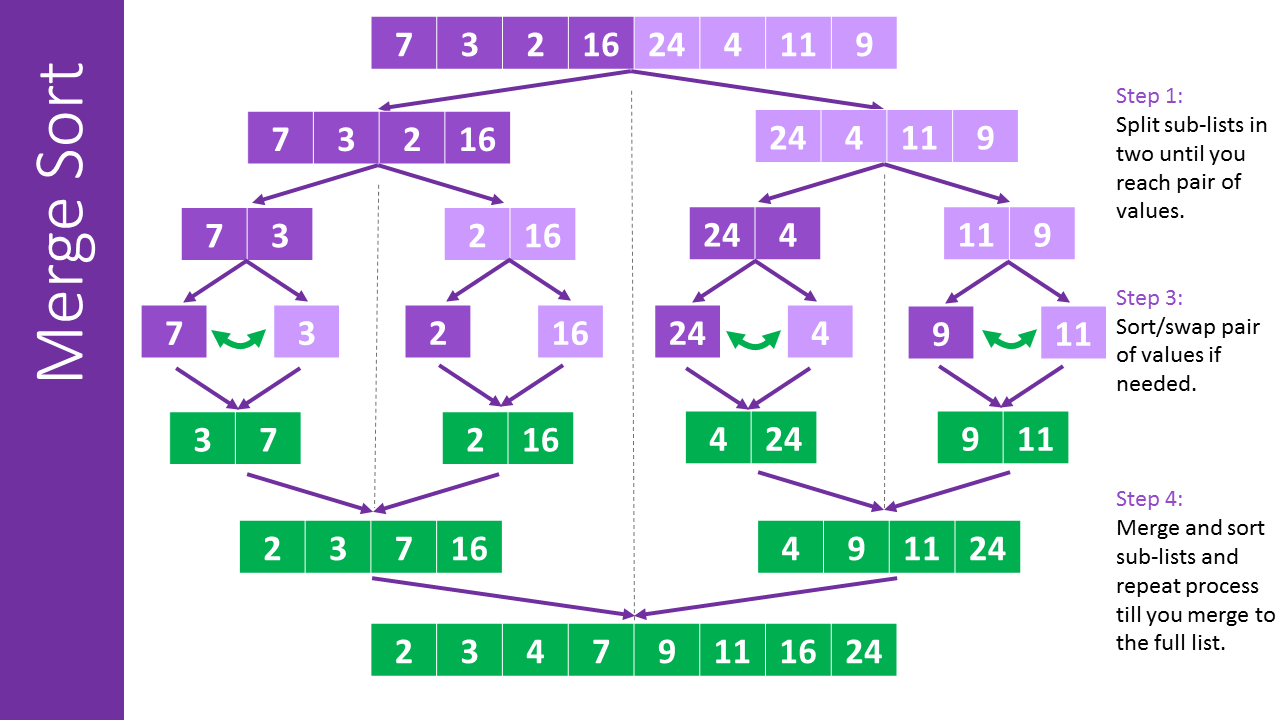



# 2) Correctitud


## 2.1)Teorema 1: Merge

Al principio de cada iteración el arreglo A[p,..., k-1] contiene los (k - p) elementos más pequeños de L[1,...,$n_1$ 
-1] y R[1,..., $n_2$
-1] en orden ascendente. Además, L[i] y R[i] son los elementos más pequeños del arreglo que no han sido copiados a A.

Inicialización: con $k = p$ se tiene que A[p,..., k-1] está vacío, con $k - p = 0$ elementos. $i = j = 1$, entonces L[i] y R[i] contienen los elementos no copiados en A.

Mantención: considerando L[i] < R[i], L[i] es el menor elemento que no está en A, con A[p,..., k-1] conteniendo los $k - p$ menores elementos. Al agregar L[i], A[k] = L[i], por lo que A[p,..., k] contiene los $k - p + 1$ menores elementos ordenados de menor a mayor. Así, queda probada la propiedad de bucle invariante de Merge.

## 2.2) Teorema 2: MergeSort

El algoritmo MergeSort genera un arreglo $[a'_1, a, a'_2,..., a'_i]$
 con los mismos elementos que el arreglo original, pero donde se cumple que $a'_1 < a'_2 <...< a'_i$
.

## 2.3) Demostración

En el caso base MergeSort entrega un arreglo de largo 1, trivialmente ordenado, con lo que se cumple P(1).

Para  elementos, el algoritmo divide el arreglo en 2 subarreglos de tamaño $a = [i/2]$ y $a = [i/2]$ y los ordena usando MergeSort.

Los 2 subarreglos son combinados con la función merge y según el Teorema, dicha función retorna un arreglo con los mismos elementos de los subarreglos pero ordenados. Así, se cumple el Teorema de Correctitud.

# 3) Tiempo de ejecucion


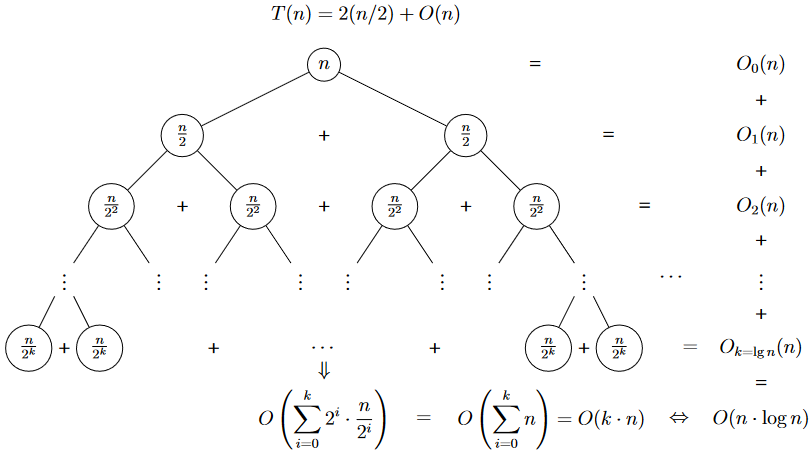

Con $T(n) = 2T(n/2) + O(n)$

Al dividir la lista en 2 partes, $2 * T(n/2)$ y aplicar la función merge, $c * n$, la siguiente division será $2 * (2 * T(n/4) + c * n/2) + c * n = 4 * T(n/4 + 2 * c *n)$

con lo que se puede deducir una generalidad:

$T(n) = 2^k * T(n/2^k) + k * c *n $ con $k = log n$

Así $T(N) = N * T(1) + N * log n => O(n log n)$

# 4) Experimentos


mejor y peor caso

In [25]:
from math import log
import matplotlib.pyplot as plt
import random

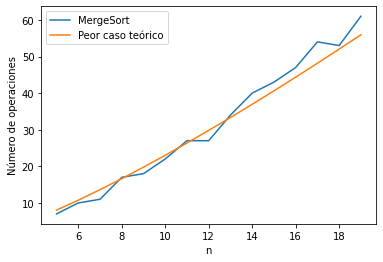

In [26]:
x = [n for n in range(5, 20)]
y1 = [n*log(n) for n in range(5, 20)]
y = []

for n in range(5, 20):
  a = random.sample(range(1, 100), n)
  c, recur = 0, 0
  mergeSort(a, 0, len(a)-1, 0)
  y.append(c)

plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["MergeSort", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel("n")
plt.ylabel("Número de operaciones")
plt.show()

Merge vs insertion

In [8]:
def insertionSort(arr, verbose=False):
    n = len(arr)
    c = 0 # Contador de comparaciones
    if verbose == True:
        print('\nInput array:', arr)
    # Se recorre el arreglo
    for i in range(1, n):
        c += 1
        if verbose == True:
            print('\nPasada', i)
        elemento = arr[i]
        j = i-1
        # Cambia la posición del elemento si es menor que su predecesor
        while j >= 0 and elemento < arr[j]:
            c += 1
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = elemento
        if verbose == True:
            print('\nArray:', arr)
    if verbose == True:
        print('\nDone')
    return arr, c

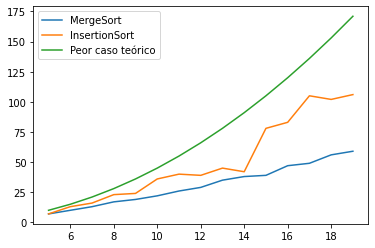

In [27]:
x = [n for n in range(5, 20)]
y = [n*(n-1)/2 for n in range(5, 20)]
y1 = []
y2 = []

for n in range(5, 20):
  a1 = random.sample(range(1, 100), n)
  a2 = random.sample(range(1, 100), n)
  c = 0
  mergeSort(a1, 0, len(a1)-1, 0)
  _, c2 = insertionSort(a2)
  y1.append(c)
  y2.append(c2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y)

plt.legend(["MergeSort", "InsertionSort", "Peor caso teórico"])
plt.show()